In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, multivariate_normal
import data, random

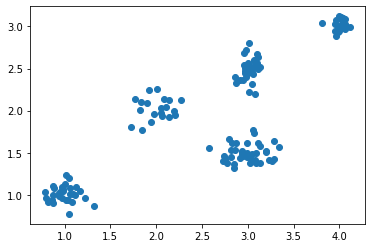

In [2]:
centers_x = [1, 2,   3,   3, 4]
centers_y = [1, 2, 1.5, 2.5, 3]
covs = [np.array([[1, 0],[0, 1]]), 
        np.array([[2, 0.3],[0.3, 1]]),
        np.array([[2, -0.3],[-0.3, 1]]),
        np.array([[1, 0.3],[0.3, 2]]), 
        np.array([[0.5, 0.1],[0.1, 0.5]])]
datanums = [30, 20, 40, 30, 20]

data = []

for i in range(5):
    p = multivariate_normal((centers_x[i], centers_y[i]), covs[i]/100)
    data.extend(p.rvs(datanums[i]))
    
random.shuffle(data)
#print(data)

plt.scatter([x for (x,y) in data], [y for (x,y) in data])
    


In [3]:
K = 10

def initial_r(data):
    rs = []
    for i,d in enumerate(data):
        r = [0]*K
        r[i%10] = 1.0
        
        rs.append(r)
        
    return rs

In [4]:
rs = initial_r(data)

In [5]:
def weighted_num(k, rs):
    return sum([r[k] for r in rs])

def weighted_mean(k, rs, data):
    return sum([ r[k]*p for (r, p) in zip(rs, data)])/weighted_num(k, rs)
    
def weighted_cov(k, rs, data):
    xbar = weighted_mean(k, rs, data)
    return sum([ r[k]*(p-xbar).reshape((2, 1)).dot((p-xbar).reshape((2, 1)).T) for (r, p) in zip(rs, data)])/weighted_num(k, rs)

In [6]:
ns = [weighted_num(k, rs) for k in range(K)]
xs = [weighted_mean(k, rs, data) for k in range(K)]
covs = [weighted_cov(k, rs, data) for k in range(K)]

In [7]:
print(ns)
print(xs)
print(covs)

[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0]
[array([2.47011879, 1.99826215]), array([2.73819807, 2.04671522]), array([2.80049486, 2.05034886]), array([2.41719776, 1.75256746]), array([2.63581237, 1.77402581]), array([2.7926695 , 2.09079642]), array([2.4581541 , 1.81566236]), array([2.23630926, 1.70365951]), array([2.58097473, 1.80390999]), array([2.61047685, 1.96150647])]
[array([[1.13692042, 0.74299932],
       [0.74299932, 0.57434093]]), array([[0.78058729, 0.39581007],
       [0.39581007, 0.44293177]]), array([[0.55520605, 0.29876996],
       [0.29876996, 0.36430595]]), array([[1.12646086, 0.58311881],
       [0.58311881, 0.51360275]]), array([[0.91833683, 0.49272411],
       [0.49272411, 0.51210729]]), array([[1.24416347, 0.8167755 ],
       [0.8167755 , 0.65933132]]), array([[0.57514067, 0.18518692],
       [0.18518692, 0.27543194]]), array([[1.06190381, 0.49144367],
       [0.49144367, 0.38681046]]), array([[1.15398219, 0.56790579],
       [0.56790579, 0.46584297

In [8]:
def update_params(org_alpha, org_beta, org_nu, org_m, org_w_inv, k, ns, xs, covs):
    alpha = org_alpha + ns[k]
    beta = org_beta + ns[k]
    nu = org_nu + ns[k]
    m = (org_beta * org_m + ns[k]*xs[k])/beta
    w_inv = org_w_inv + ns[k]*covs[k] + (org_beta*ns[k])/(org_beta + ns[k])*(xs[k] - org_m).reshape((2,1)).dot((xs[k] - org_m).reshape((2,1)).T)
    
    return (alpha, beta, nu, m, w_inv)

In [12]:
alphas = [1]*K
betas = [1]*K
nus = [1]*K
ms = [np.array([0,0])]*K
w_invs = [np.array([[1, 0],[0, 1]])]*K

for k in range(K):
    params = update_params(alphas[k], betas[k], nus[k], ms[k], w_invs[k], k, ns, xs, covs)
    alphas[k] = params[0]
    betas[k] = params[1]
    nus[k] = params[2]
    ms[k] = params[3]
    w_invs[k] = params[4]
    
print(alphas)
print(betas)
print(nus)
print(ms)
print(w_invs)

[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
[array([2.3054442 , 1.86504468]), array([2.55565154, 1.91026753]), array([2.61379521, 1.91365894]), array([2.25605124, 1.63572963]), array([2.46009154, 1.65575742]), array([2.60649153, 1.95140999]), array([2.29427716, 1.69461821]), array([2.08722197, 1.59008221]), array([2.40890975, 1.68364932]), array([2.43644506, 1.83073937])]
[array([[22.61160694, 15.0088724 ],
       [15.0088724 , 12.76762122]]), array([[18.92610214, 10.77203183],
       [10.77203183, 11.11081838]]), array([[16.0928047 ,  9.54197146],
       [ 9.54197146, 10.02395177]]), array([[22.223774  , 12.11754527],
       [12.11754527, 11.05716508]]), array([[20.34105538, 11.26240337],
       [11.26240337, 11.10685851]]), array([[25.69735796, 16.88450015],
       [16.88450015, 14.31063949]]), array([[14.69165621,  6.75824956],
       [ 6.7582495

In [ ]:
def rho(i, k, alphas, betas, nus, ms, w_invs):
    pass